In [17]:
import pandas as pd
import numpy as np
import sys
sys.path.append( 'C:\Machine Learning\mylib' )
sys.path.append( 'L:\ML\mylib' )
import K_means as Km
import PCA as Pca
import LassoRegression as LS
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import classification_report

In [18]:
df_regress = pd.read_csv('../datasets/trip_duration_task_pred.csv')
df_classif = pd.read_csv('../datasets/csgo_task_pred.csv')
df_classif = df_classif.drop(columns=df_classif.iloc[:,:1], axis=1)

In [19]:
y_regress, X_regress1 =  df_regress["trip_duration"], df_regress.drop(["trip_duration"], axis=1)
y_classif, X_classif1=  df_classif["bomb_planted"], df_classif.drop(["bomb_planted"], axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_regress = pd.DataFrame(min_max_scaler.fit_transform(X_regress1))
X_classif = pd.DataFrame(min_max_scaler.fit_transform(X_classif1))

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_classif, y_classif = ros.fit_resample(X_classif, y_classif)

In [30]:
def check_regress(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
    ls = Lasso(alpha=0.9).fit(X_train, y_train)
    y_pred = ls.predict(X_test)
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {ls.score(X_test, y_test)}')

In [31]:
def check_classif(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
    lr = LogisticRegression(random_state=42, C=0.5, n_jobs=-1).fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

In [8]:
check_regress(X_regress, y_regress)

MAE: 627.7963278566577
MSE: 34944969.55392936
RMSE: 5911.427031938173
MAPE: 1.2566166668679033
R^2: 0.0002160738286709485


In [9]:
check_classif(X_classif, y_classif)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     21714
           1       0.92      0.98      0.95     21701

    accuracy                           0.95     43415
   macro avg       0.95      0.95      0.95     43415
weighted avg       0.95      0.95      0.95     43415



In [124]:
X_regress.describe()

,0,1,2,3,4,5,6,7,8
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,0.500000,0.536770,0.502584,0.499998,0.184673,0.855876,0.351724,0.855877,0.730044
std,0.288676,0.498646,0.283273,0.281794,0.145827,0.001245,0.001955,0.001242,0.003070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.262537,0.261199,0.111111,0.855549,0.350936,0.855558,0.728694
50%,0.500000,1.000000,0.504007,0.501415,0.111111,0.855729,0.351907,0.855764,0.730277
75%,0.750000,1.000000,0.743410,0.739602,0.222222,0.855986,0.352734,0.856063,0.731574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
X_classif.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,...,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000,217074.000000
mean,0.498694,0.372835,0.206878,0.203478,0.621826,0.543809,0.509281,0.554733,0.089428,0.117036,...,0.668719,0.610270,0.000972,0.186830,0.208252,0.151911,0.145927,0.108530,0.107456,0.090121
std,0.289015,0.317869,0.150666,0.144222,0.333898,0.272620,0.323309,0.325440,0.118966,0.135802,...,0.311593,0.251556,0.031162,0.389776,0.406059,0.358936,0.353034,0.311049,0.309693,0.286356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249704,0.133951,0.093750,0.090909,0.330000,0.331667,0.200000,0.334000,0.010625,0.017500,...,0.400000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.497970,0.211784,0.187500,0.181818,0.600000,0.583333,0.400000,0.588000,0.040625,0.063750,...,0.600000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.747698,0.542545,0.312500,0.303030,1.000000,0.833333,0.800000,0.800000,0.125625,0.172500,...,1.000000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
X_classif.shape[1]

23

Отбор через дисперсию

In [128]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.2)
X_regress_vt = vt.fit_transform(X_regress)
X_regress_vt.shape

(729322, 1)

In [129]:
check_regress(X_regress_vt, y_regress)

MAE: 628.7979717292304
MSE: 34945424.441685766
RMSE: 5911.465507104458
MAPE: 1.2577842790132197
R^2: 0.00020305938130216195


In [130]:
vt = VarianceThreshold(0.10) #меньше 10 признаков сильно проседает
X_classif_vt = vt.fit_transform(X_classif)
X_classif_vt.shape

(217074, 10)

In [131]:
check_classif(X_classif_vt, y_classif)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     21714
           1       0.92      0.98      0.95     21701

    accuracy                           0.95     43415
   macro avg       0.95      0.95      0.95     43415
weighted avg       0.95      0.95      0.95     43415



FutureSelection

In [132]:
from sklearn.feature_selection import SelectKBest

In [133]:
skb = SelectKBest(k=6)
X_regress_skb = skb.fit_transform(X_regress, y_regress)

In [134]:
check_regress(X_regress_skb, y_regress)

MAE: 622.0201184558114
MSE: 34952322.68292834
RMSE: 5912.048941181757
MAPE: 1.261458291543036
R^2: 5.6990515834298705e-06


In [135]:
skb = SelectKBest(k=3) #на 2 уже сильно проседает
X_classif_skb = skb.fit_transform(X_classif, y_classif)

In [136]:
check_classif(X_classif_skb, y_classif)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21714
           1       0.91      0.98      0.94     21701

    accuracy                           0.94     43415
   macro avg       0.94      0.94      0.94     43415
weighted avg       0.94      0.94      0.94     43415



Рекурсивынй отбор

In [24]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree_cls = DecisionTreeClassifier().fit(X_classif, y_classif)
tree_reg = DecisionTreeRegressor().fit(X_regress, y_regress)

In [139]:
rfe = RFE(estimator=tree_reg, n_features_to_select=4, step=1).fit(X_regress, y_regress)
X_regress_rfe = pd.DataFrame(rfe.transform(X_regress), columns=rfe.get_feature_names_out())

In [140]:
check_regress(X_regress_rfe, y_regress)

MAE: 622.0302991180631
MSE: 34952854.74758909
RMSE: 5912.093939340704
MAPE: 1.261471342453783
R^2: -9.523445453796242e-06


In [141]:
rfe = RFE(estimator=tree_cls, n_features_to_select=1, step=1).fit(X_classif, y_classif)
X_classif_rfe = pd.DataFrame(rfe.transform(X_classif), columns=rfe.get_feature_names_out())

In [142]:
check_classif(X_classif_rfe, y_classif)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     21714
           1       0.91      1.00      0.95     21701

    accuracy                           0.95     43415
   macro avg       0.95      0.95      0.95     43415
weighted avg       0.95      0.95      0.95     43415



Отбор деревом

<BarContainer object of 9 artists>

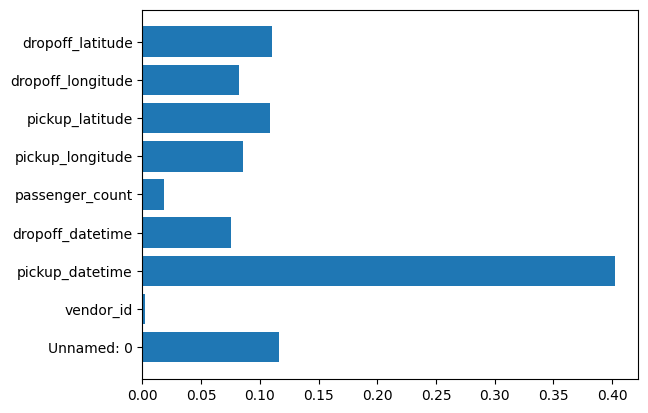

In [26]:
import matplotlib.pyplot as plt
plt.barh(width=tree_reg.feature_importances_, y=X_regress1.columns)

In [27]:
tree_cls.feature_importances_

array([9.25695116e-01, 3.66009139e-03, 3.79378339e-03, 4.09545647e-03,
       5.68904441e-03, 2.57211910e-02, 5.37111366e-03, 5.54100234e-03,
       6.59157947e-03, 1.62278501e-03, 1.63405036e-03, 1.66520257e-03,
       8.69507167e-04, 2.10130821e-03, 0.00000000e+00, 1.11135251e-03,
       9.33629757e-04, 7.44421874e-04, 4.80799006e-04, 1.21226430e-03,
       8.21049995e-04, 6.45251402e-04])

In [39]:
X_regress_new = X_regress1["pickup_datetime"]
X_regress_new = np.array(X_regress_new).reshape(-1,1)
X_regress_new.shape

(729322, 1)

In [40]:
check_regress(X_regress_new, y_regress)

MAE: 622.0254291192588
MSE: 34953012.91380422
RMSE: 5912.107315822694
MAPE: 1.2614615521353754
R^2: -1.4048618649509237e-05


l:\ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.055e+11, tolerance: 5.794e+08
  model = cd_fast.enet_coordinate_descent(


<BarContainer object of 22 artists>

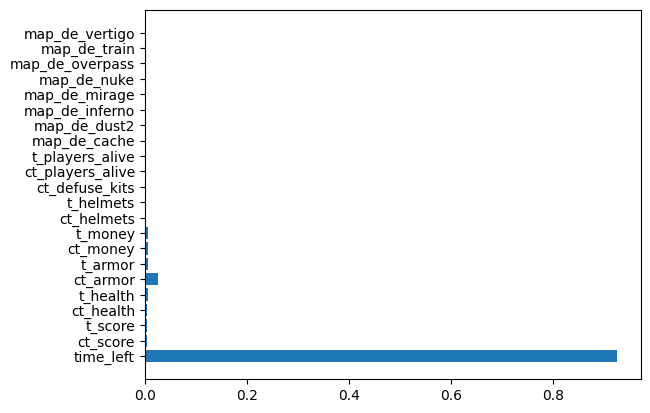

In [28]:
plt.barh(width=tree_cls.feature_importances_, y=X_classif1.columns)

In [44]:
df_classif_new = pd.read_csv('../datasets/csgo_task_pred.csv')
df_classif_new = df_classif.drop(columns=df_classif.iloc[:,:1], axis=1)
X_classif_new = df_classif["time_left"]
y_classif_new = df_classif["bomb_planted"]
min_max_scaler = MinMaxScaler()
X_classif_new = pd.DataFrame(min_max_scaler.fit_transform(np.array(X_classif_new).reshape(-1,1)))
ros = RandomOverSampler(random_state=42)
X_classif_new, y_classif_new = ros.fit_resample(X_classif_new, y_classif_new)

In [46]:
check_classif(X_classif_new, y_classif)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     21714
           1       0.91      1.00      0.95     21701

    accuracy                           0.95     43415
   macro avg       0.95      0.95      0.95     43415
weighted avg       0.95      0.95      0.95     43415



PCA

In [161]:
from sklearn.decomposition import PCA

In [175]:
pca = PCA(n_components=1)
X_regress_pca = pca.fit_transform(X_regress, y_regress)

In [176]:
check_regress(X_regress_pca, y_regress)

MAE: 628.8253829476458
MSE: 34945396.73522848
RMSE: 5911.463163653181
MAPE: 1.2576823848562317
R^2: 0.00020385206966333502


In [177]:
sum(pca.explained_variance_ratio_)

0.48846902953799115

In [180]:
pca1 = PCA(n_components=2)
X_classif_pca = pca.fit_transform(X_classif, y_classif)

In [181]:
check_classif(X_classif_pca, y_classif)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     21714
           1       0.87      0.86      0.87     21701

    accuracy                           0.87     43415
   macro avg       0.87      0.87      0.87     43415
weighted avg       0.87      0.87      0.87     43415



In [183]:
sum(pca.explained_variance_ratio_)

0.2410547676152643

Нелинейные методы

In [10]:
from sklearn.manifold import TSNE, Isomap

In [7]:
df_regress = df_regress.sample(1000)
df_classif = df_classif.sample(1000)
y_regress, X_regress1 =  df_regress["trip_duration"], df_regress.drop(["trip_duration"], axis=1)
y_classif, X_classif1=  df_classif["bomb_planted"], df_classif.drop(["bomb_planted"], axis=1)
min_max_scaler = MinMaxScaler()
X_regress = pd.DataFrame(min_max_scaler.fit_transform(X_regress1))
X_classif = pd.DataFrame(min_max_scaler.fit_transform(X_classif1))
ros = RandomOverSampler(random_state=42)
X_classif, y_classif = ros.fit_resample(X_classif, y_classif)

In [34]:
tsne = TSNE(n_components=2)
X_tsne_regress = tsne.fit_transform(X_regress)

In [35]:
check_regress(X_tsne_regress, y_regress)

MAE: 573.5084439086914
MSE: 492061.48165786715
RMSE: 701.4709414208597
MAPE: 1.3374731187306401
R^2: -0.11861118212709765


In [36]:
tsne = TSNE(n_components=2)
X_tsne_classif = tsne.fit_transform(X_classif)

In [37]:
check_classif(X_tsne_classif, y_classif)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       169
           1       0.70      0.66      0.68       185

    accuracy                           0.68       354
   macro avg       0.68      0.68      0.68       354
weighted avg       0.68      0.68      0.68       354



In [44]:
isomap = Isomap(n_components=1)
X_isomap_regress = isomap.fit_transform(X_regress)

C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [45]:
check_regress(X_isomap_regress, y_regress)

MAE: 543.4957464873403
MSE: 463506.4248581092
RMSE: 680.8130616095061
MAPE: 1.2794580641757518
R^2: -0.053696517937444455


In [52]:
isomap = Isomap(n_components=2)
X_isomap_classif = isomap.fit_transform(X_classif)

C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 42 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is 

C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXi

C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\XE\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXi

In [53]:
check_classif(X_isomap_classif, y_classif)

              precision    recall  f1-score   support

           0       0.88      0.67      0.77       169
           1       0.76      0.92      0.83       185

    accuracy                           0.80       354
   macro avg       0.82      0.80      0.80       354
weighted avg       0.82      0.80      0.80       354



Моя реализация PCA

In [8]:
p = Pca.PCA(2)
new_data = p.fit_transform(X_classif)

In [9]:
md = Km.K_means(2, 1)
md.fit(new_data, 10)
pred = md.predict(new_data)

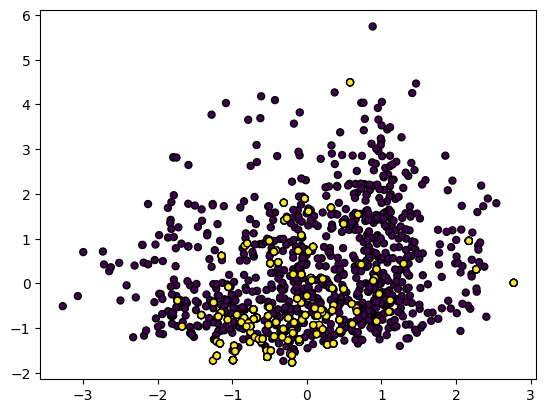

In [12]:
plt.scatter(new_data[:,0], new_data[:,1], marker="o", c=y_classif, s=25, edgecolor="k")
plt.show()

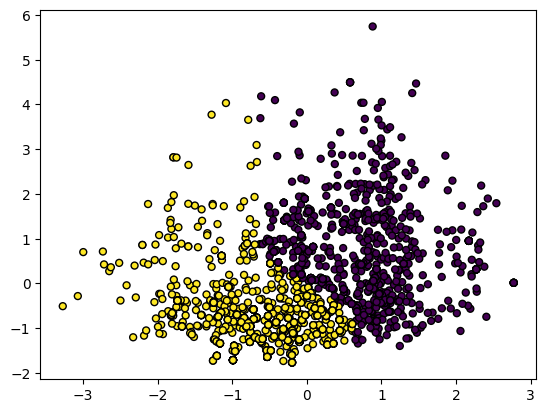

In [11]:
import matplotlib.pyplot as plt
plt.scatter(new_data[:,0], new_data[:,1], marker="o", c=pred, s=25, edgecolor="k")
plt.show()

Проверка на регрессии Лассо

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_regress, y_regress, test_size = 0.2,random_state = 42)

In [15]:
linear_reg = LS.LassoRegressionModel(0.1, 1000, 0.1)
linear_reg.Train(np.array(X_train), np.array(y_train)) 

In [16]:
linear_reg.coefs #первый это смещение

array([961.20565707,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  25.97017372])